<a href="https://colab.research.google.com/github/luchia0602/R/blob/main/%D0%90%D0%BD%D0%94%D0%B0%D0%BD_%D0%B4%D0%B7_1_%D0%A8%D0%BB%D1%8F%D1%85%D1%82%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#knitr::opts_chunk$set(echo = TRUE, error=TRUE)
### 0. О том, как выполнять это домашнее задание.

#Это задание написано в формате R Markdown (.Rmd). Чтобы облегчить его проверку, мы просим вас писать код в блоки для кода на R, например,

#```{r example}
# YOUR CODE HERE
# (хештеги используются для комментариев, убирайте хештеги в начале строки, чтобы ваш код запускался)
#```

#и текст в блоки для текста. Пожалуйста, впишите ниже ваше имя и фамилию:

#```
#Мое имя: Шляхтина Людмила
#```

#Перед сдачей домашнего задания рекомендуем запустить `Run All` или сгенерировать html- или pdf-страницу с помощью `Knit`, чтобы убедиться, что в финальной версии весь ваш код будет запускаться без проблем.

#Файл Rmd (`HW1.Rmd`) и сгенерированный из него html (вариант - pdf) вышлите
#на почту `neurolong@gmail.com` с темой `da4cl`.

## 1. Частотность и фонетика

Во многих лингвистических исследованиях отмечается, что часто используемые в языке слова звучат короче, а при их произнесении наблюдается редукция и коартикуляция. Работа [Fabian Tomaschek et al.](https://www.semanticscholar.org/paper/Practice-makes-perfect-%3A-The-consequences-of-for-Tomaschek-Tucker/1e0dbc3787a6da84ffd4c3cae62f1340e4267694) (2018) исследует гипотезу, что моторные навыки произнесения улучшаются с опытом, который, в свою очередь, напрямую связан с частотностью слова. Ученые попросили испытуемых (17 бакалавров университета Тюбингена, 8 мужчин и 9 женщин) прочитать вслух немецкие глаголы, содержащие звук [a:] в основе. Испытуемые были поставлены в экспериментальные условия, которые исподволь заставляли их читать быстрее или медленнее (slow/fast condition).

В этом задании мы просим вас в графическом виде показать распределение в датасете длины звучания всего слова целиком, а также распределение длины звучания интересующего ученых сегмента (звука [a:]) в условиях slow и fast. Хотя логично предположить, что в условии fast произнесение и слов, и сегментов будет короче, все же нужно убедиться, что данные это подтверждают, прежде чем переходить к более сложному анализу по сути вопроса. Кроме того, мы будем уверены, что экспериментальные условия были должным образом соблюдены, ученые не запутались в кодировании данных и документировали результаты корректно.

**Интересующие нас переменные:**

-   `LogDurationW` - log-transformed word duration (логарифм длины произнесения слова)\
-   `LogDurationA` - log-transformed segment duration (логарифм длины произнесения сегмента)\
-   `Cond` - condition: slow vs. fast (условие).

### 1.1 Загрузка данных

Загрузите пакеты `tidyverse` и `skimr`.  
С помощью функции `read_csv` загрузите данные ([link](https://raw.githubusercontent.com/LingData2019/LingData2020/master/data/dur_word_frequency.csv)) в переменную `dur_word_freq`.  
Используйте функции `summary()`, `glimpse()` и `skim()` (последняя из пакета `skimr`), чтобы изучить структуру данных.

In [ ]:
install.packages("skimr")
install.packages("tidyverse")
install.packages("readr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(skimr)
library(readr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
dur_word_freq <- read_csv("https://raw.githubusercontent.com/LingData2019/LingData2020/master/data/dur_word_frequency.csv", na = c("-", "-99"))

New names:
• `` -> `...1`
Rows: 832 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Lemma, Participant, Cond, Exponent
dbl (4): ...1, LogDurationA, LogDurationW, Frequency

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
summary(dur_word_freq)

      ...1           LogDurationA     LogDurationW        Lemma          
 Min.   :       1   Min.   :-3.507   Min.   :-1.2378   Length:832        
 1st Qu.:    3949   1st Qu.:-1.811   1st Qu.:-0.6330   Class :character  
 Median :    7948   Median :-1.670   Median :-0.5108   Mode  :character  
 Mean   :  451082   Mean   :-1.681   Mean   :-0.5130                     
 3rd Qu.:  541999   3rd Qu.:-1.534   3rd Qu.:-0.4005                     
 Max.   :16981104   Max.   :-1.097   Max.   : 0.5787                     
 Participant            Cond             Exponent           Frequency     
 Length:832         Length:832         Length:832         Min.   :-7.598  
 Class :character   Class :character   Class :character   1st Qu.:-6.759  
 Mode  :character   Mode  :character   Mode  :character   Median :-6.203  
                                                          Mean   :-6.170  
                                                          3rd Qu.:-5.741  
                                

In [ ]:
glimpse(dur_word_freq)

Rows: 832
Columns: 8
$ ...1         <dbl> 11431, 1, 136, 71, 11581, 33, 100, 16957, 127, 163, 218, …
$ LogDurationA <dbl> -1.324496, -1.357757, -1.496422, -1.284340, -1.331510, -1…
$ LogDurationW <dbl> -0.4768593, -0.3595504, -0.2701372, -0.3773472, -0.447127…
$ Lemma        <chr> "schab", "blas", "schlaf", "lahm", "lahm", "fahnd", "mahn…
$ Participant  <chr> "Art_02_S01", "Art_02_S01", "Art_02_S01", "Art_02_S01", "…
$ Cond         <chr> "slow", "slow", "slow", "slow", "slow", "slow", "slow", "…
$ Exponent     <chr> "t", "n", "en", "en", "t", "en", "en", "t", "n", "n", "n"…
$ Frequency    <dbl> -6.980044, -5.740760, -4.676302, -6.263638, -6.469370, -6…


In [ ]:
skim(dur_word_freq) # Структура данных выводится, но я так и не смогла исправить эту ошибку. По всей видимости, проблема именно в колабе.

── Data Summary ────────────────────────
                           Values       
Name                       dur_word_freq
Number of rows             832          
Number of columns          8            
_______________________                 
Column type frequency:                  
  character                4            
  numeric                  4            
________________________                
Group variables            None         

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 Lemma                 0             1   3   7     0       17          0
2 Participant           0             1  10  10     0       17          0
3 Cond                  0             1   4   4     0        2          0
4 Exponent              0             1   1   2     0        3          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 17' in coercion to 'logical(1)'


In [ ]:
Sys.info()

sysname 
                                              "Linux" 
                                              release 
                                            "6.1.85+" 
                                              version 
"#1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024" 
                                             nodename 
                                       "06d97aae35fb" 
                                              machine 
                                             "x86_64" 
                                                login 
                                            "unknown" 
                                                 user 
                                               "root" 
                                       effective_user 
                                               "root"

In [ ]:
installed.packages("skimr")

Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built


In [ ]:
update.packages("skimr")

In [ ]:
Sys.getlocale()

[1] "LC_CTYPE=en_US.UTF-8;LC_NUMERIC=C;LC_TIME=en_US.UTF-8;LC_COLLATE=en_US.UTF-8;LC_MONETARY=en_US.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [ ]:
Sys.getenv()

_PYVIZ_COMMS_INSTALLED
                        1
_R_CHECK_COMPILATION_FLAGS_KNOWN_
                        -Wformat -Werror=format-security -Wdate-time
CGROUP_MEMORY_EVENTS    /sys/fs/cgroup/memory.events
                        /var/colab/cgroup/jupyter-children/memory.events
CLOUDSDK_CONFIG         /content/.config
CLOUDSDK_PYTHON         python3
COLAB_BACKEND_VERSION   next
COLAB_DEBUG_ADAPTER_MUX_PATH
                        /usr/local/bin/dap_multiplexer
COLAB_FILE_HANDLER_ADDR
                        localhost:3453
COLAB_GPU               
COLAB_JUPYTER_IP        172.28.0.12
COLAB_JUPYTER_TOKEN     
COLAB_JUPYTER_TRANSPORT
                        ipc
COLAB_KERNEL_MANAGER_PROXY_HOST
                        172.28.0.12
COLAB_KERNEL_MANAGER_PROXY_PORT
                        6000
COLAB_LANGUAGE_SERVER_PROXY
                        /usr/colab/bin/language_service
COLAB_LANGUAGE_SERVER_PROXY_LSP_DIRS
                        /datalab/web/pyright/typeshed-fallback/stdlib,/usr/local/lib/

In [ ]:
??skim

### 1.2 Типы данных

Какие базовые типы переменных (строковые, числовые (непрерывные), целочисленные, логические, комплексные) представляют данные в столбцах `dur_word_freq`?

In [ ]:
# Числовые (непрерывные): LogDurationA (логарифм длины произнесения сегмента), LogDurationW (логарифм длины произнесения слова), Frequency (частотность слова)
# Строковые: Lemma (леммы слов), Participant (идентификатор участника эксперимента), Cond (условие), Exponent (экспонента)
# Целочисленных, логических и комплексных нет.

### 1.3 Визуализации ggplot: график плотности (density plot)

О графике плотности распределения можно думать как о сглаженной гистограмме с большим числом столбцов. Общая площадь под графиком составляет 1. Раскомментируйте и запустите следующий код, который позволяет представить распределение непрерывных значений переменной `LogDurationA`, сгруппированных по переменной `Cond` (т. е. длина звука а в условиях fast и slow).

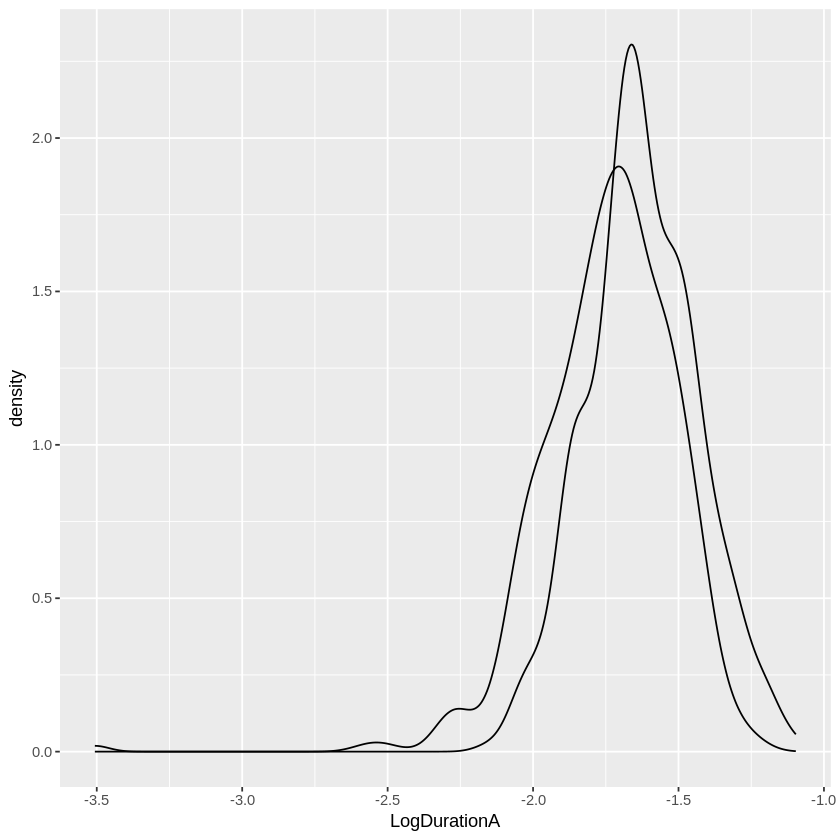

In [ ]:
dur_word_freq |>
ggplot(aes(x = LogDurationA, group = Cond)) +
geom_density()

### 1.4

Добавьте в график тему `theme_classic()` и полупрозрачность (alpha = 0.5, указывается в геоме плотности).

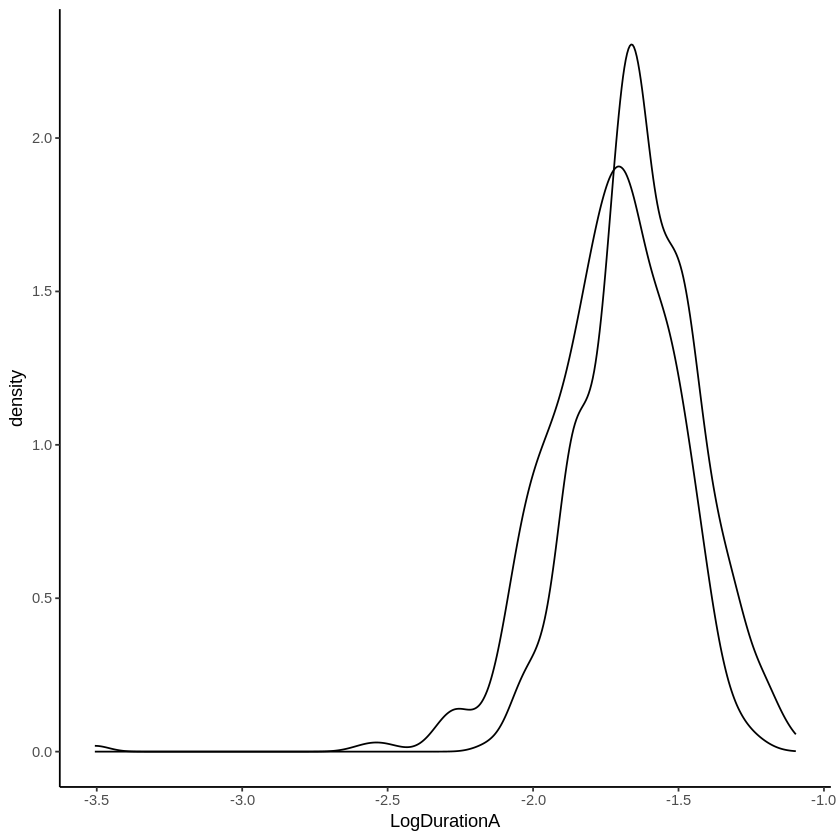

In [ ]:
dur_word_freq |>
ggplot(aes(x = LogDurationA, group = Cond)) +
geom_density(alpha = 0.5)  +
theme_classic()

### 1.5

Постройте график плотности распределения длины всего слова (переменная `LogDurationW`) для всех данных (без деления по условиям).

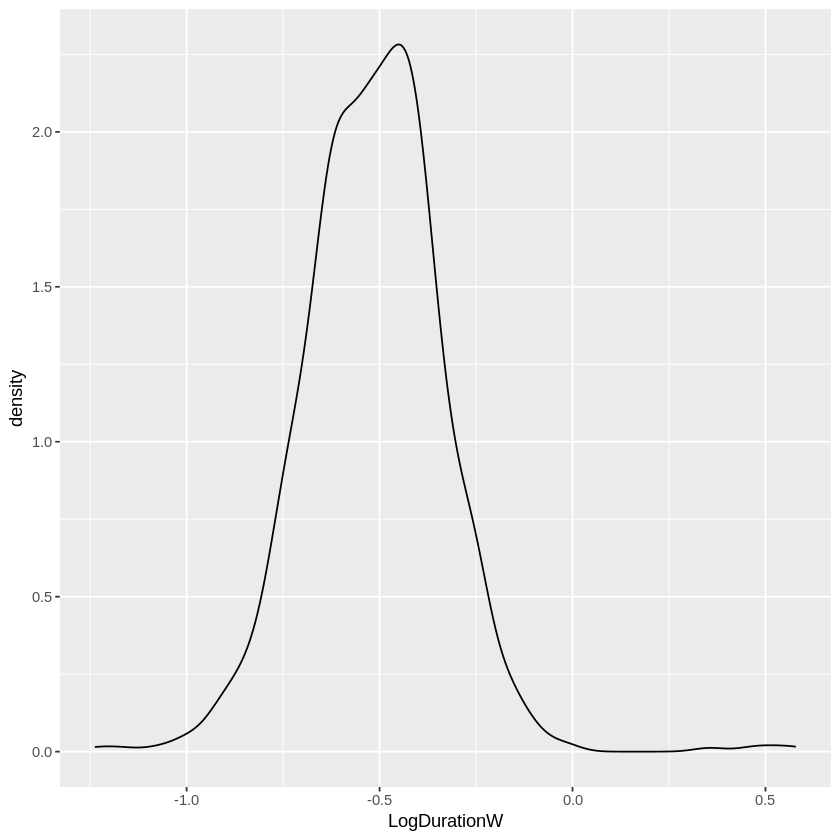

In [ ]:
dur_word_freq |>
ggplot(aes(x = LogDurationW)) +
geom_density()

### 1.6 Боксплот (базовый R)

Раскомментируйте и запустите следующий код.

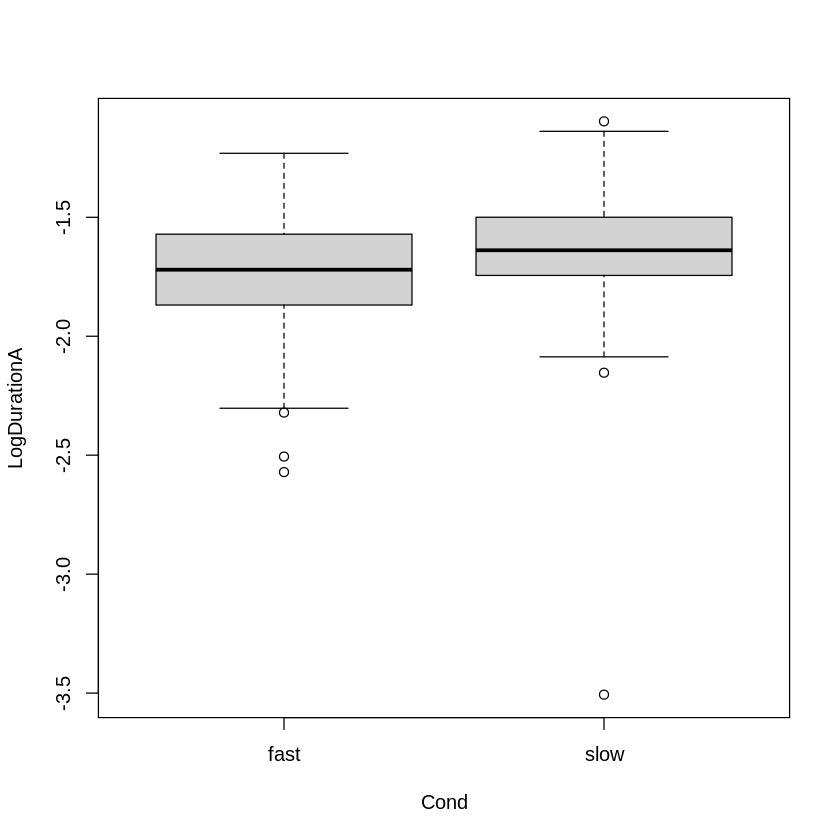

In [ ]:
boxplot(LogDurationA ~ Cond, data=dur_word_freq)

### 1.7   

Сравните положение медианных значений `LogDurationA`, а также значений 1-го и 3-го квартиля в условиях fast и slow, запишите кратко ваши выводы ниже (2-3 предложения).

In [ ]:
# Гипотеза о том, что при увеличении скорости чтения длительность сегмента сокращается, подтверждается графиком: медианное значение длины произнесения сегмента в быстрых условиях немного ниже, чем в медленных.
# Экспериментальные условия, судя по графику, тоже были соблюдены должным образом: значения 1-го и 3-го квартиля выше для быстрых условий, чем для медленных, что мы и ожидали получить.
# В целом скорость произнесения сегмента выше, когда участников эксперимента просили читать быстро.

### 1.8. Боксплот в ggplot2

Для переменной `LogDurationW` представим боксплоты в условиях fast и slow с помощью пакета `ggplot2` (геом `geom_boxplot`).
По оси X у вас будут заданы два боксплота (задаются переменной `Cond`). По оси Y будет представлено распределение длин в переменной `LogDurationW`. Заливка должна зависеть от условия (переменной `Cond`). Все эти три аргумента задаются в базовой эстетике ggplot.  
Измените (сделайте более понятными) подписи осей X и Y, добавьте тему `theme_classic()`.

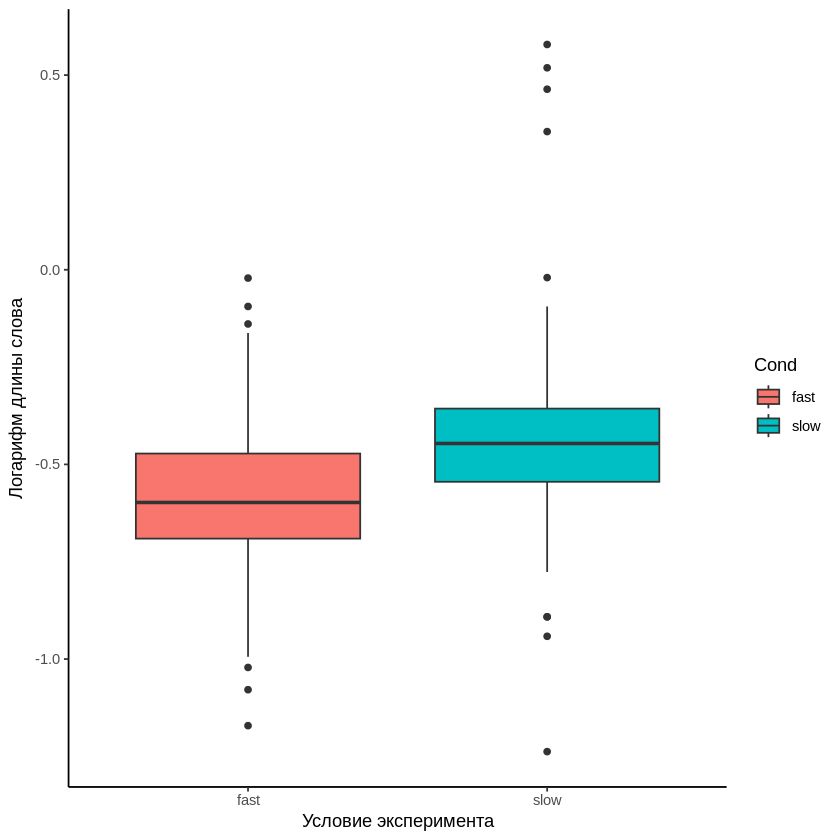

In [ ]:
dur_word_freq |>
ggplot(aes(x = Cond, y = LogDurationW, fill = Cond)) +
geom_boxplot() +
theme_classic() +
labs(
x = "Условие эксперимента",
y = "Логарифм длины слова"
)

Необязательное задание - измените цвет заполнения боксплотов с помощью `scale_fill_brewer` из пакета `RColorBrewer` (палитра Dark2).

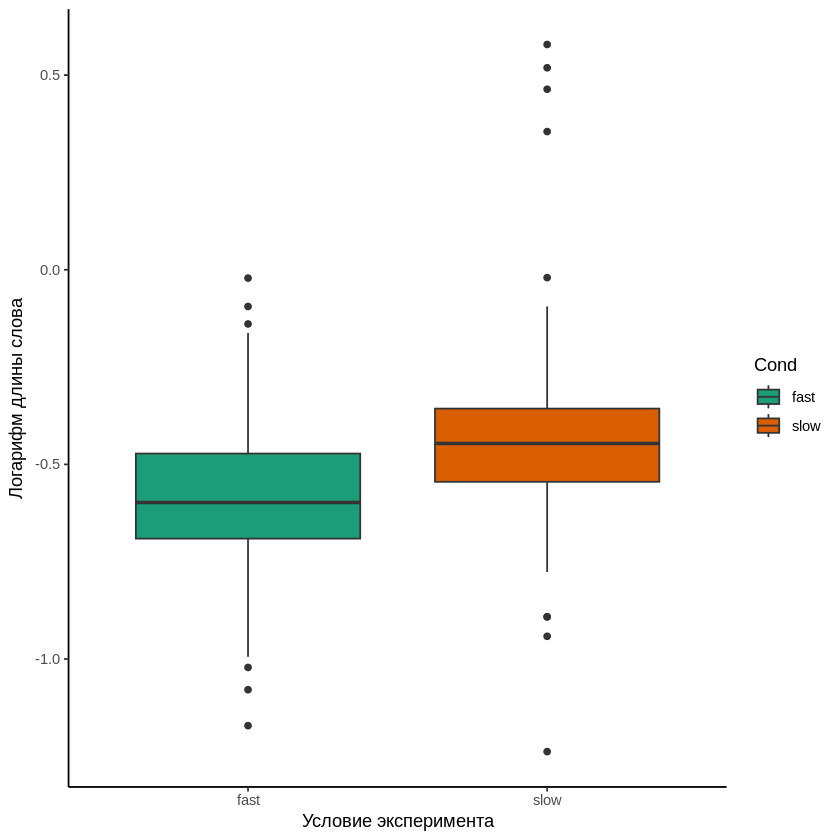

In [ ]:
dur_word_freq |>
ggplot(aes(x = Cond, y = LogDurationW, fill = Cond)) +
geom_boxplot() +
scale_fill_brewer(palette = "Dark2") +
theme_classic() +
labs(
x = "Условие эксперимента",
y = "Логарифм длины слова"
)

### 1.9 Скрипичный плот в ggplot2

С помощью ggplot2 постройте скрипичные графики (violin plot, геом `geom_violin`) для переменной `LogDurationA` в двух условиях fast и slow.

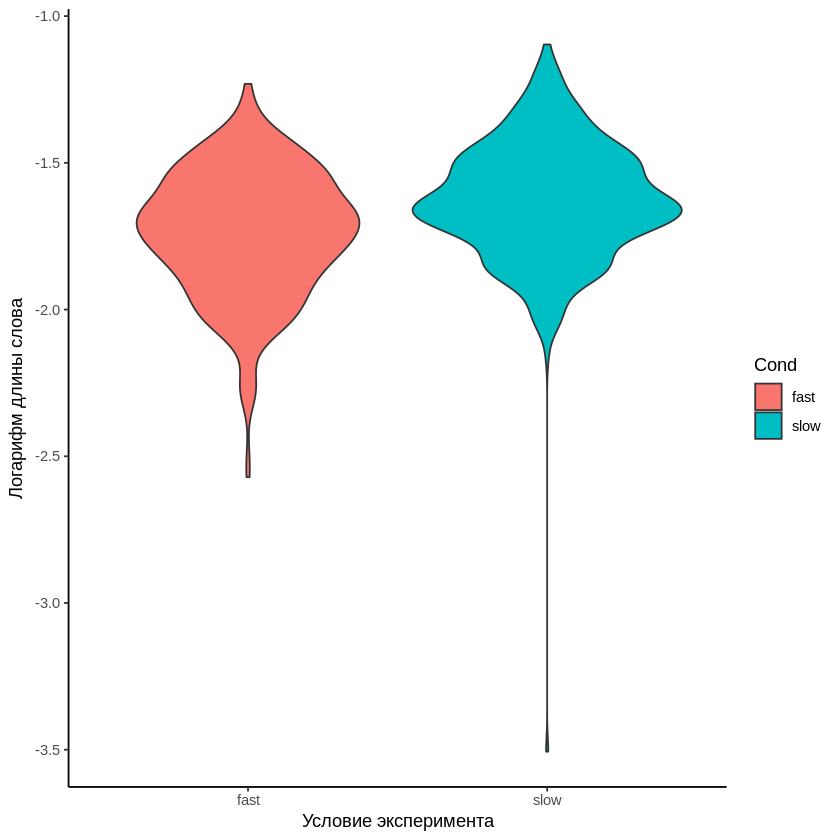

In [ ]:
dur_word_freq |>
ggplot(aes(x = Cond, y = LogDurationA, fill = Cond)) +
geom_violin() +
theme_classic() +
labs(
x = "Условие эксперимента",
y = "Логарифм длины слова"
)

### 1.10 Jitter

К предыдущему графику 1.9 новым слоем добавьте конкретные точки из вашего датасета, при этом используйте jitter (геом `geom_jitter`), чтобы немного развести точки в стороны.

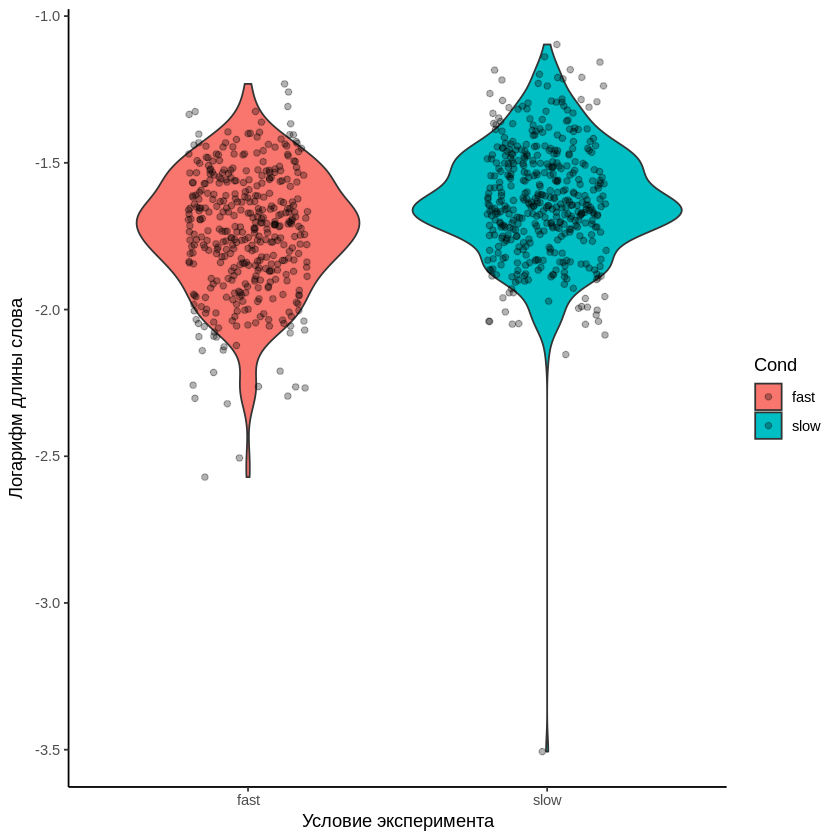

In [ ]:
dur_word_freq |>
ggplot(aes(x = Cond, y = LogDurationA, fill = Cond)) +
geom_violin() +
geom_jitter(alpha = 0.3, width = 0.2) +
theme_classic() +
labs(
x = "Условие эксперимента",
y = "Логарифм длины слова"
)

### 1.11. Скаттерплот в ggplot2

Постройте диаграмму рассеяния (= точечную диаграмму = скаттерплот, геом `geom_point`) для переменных `LogDurationA` (по оси X) и `LogDurationW` (по оси Y). Используйте прозрачность 0.3. Добавьте на график регрессионную прямую (метод "lm").

`geom_smooth()` using formula = 'y ~ x'


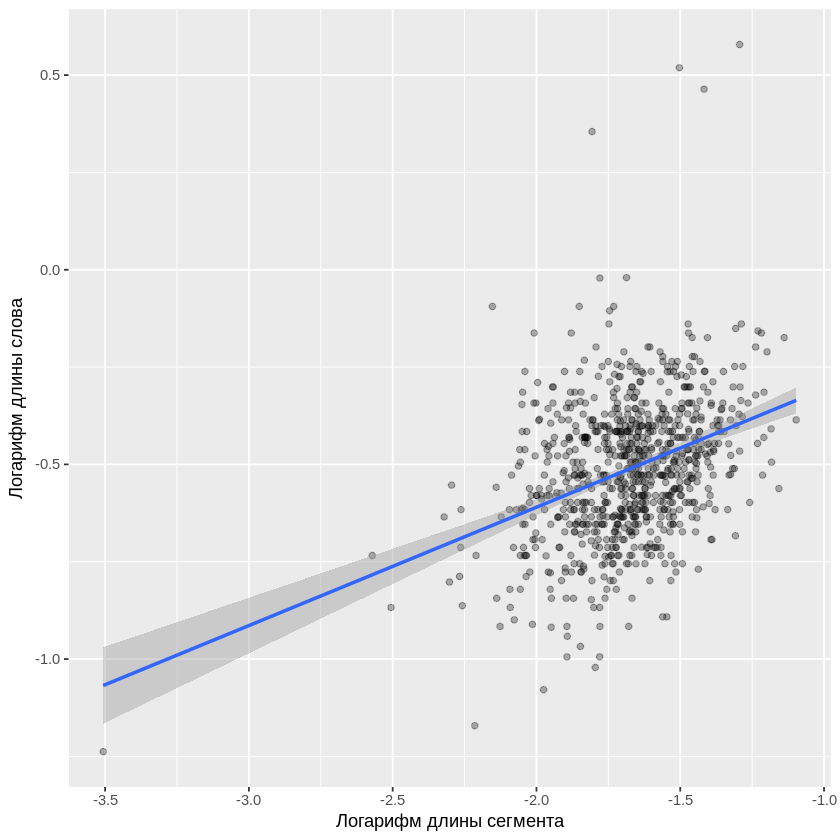

In [ ]:
dur_word_freq |>
ggplot(aes(x = LogDurationA, y = LogDurationW)) +
geom_point(alpha = 0.3) +
geom_smooth(method = "lm") +
labs(
x = "Логарифм длины сегмента",
y = "Логарифм длины слова"
)